In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df=pd.read_csv('Loan Eligibility Prediction.csv')
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [3]:
df.sample()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
78,73,Male,No,0,Graduate,No,3500,0.0,81,300,1,Semiurban,Y


In [4]:
df.tail()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y
613,606,Male,Yes,0,Not Graduate,No,2400,3800.0,25,180,1,Urban,N


In [5]:
df.isnull().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [7]:
df.shape

(614, 13)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,614.0,307.500000,177.390811,1.0,154.25,307.5,460.75,614.0
Dependents,614.0,0.856678,1.216651,0.0,0.00,0.0,2.00,4.0
Applicant_Income,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
Loan_Amount,614.0,142.022801,87.083089,9.0,98.00,125.0,164.75,700.0
Loan_Amount_Term,614.0,338.892508,69.716355,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.850163,0.357203,0.0,1.00,1.0,1.00,1.0


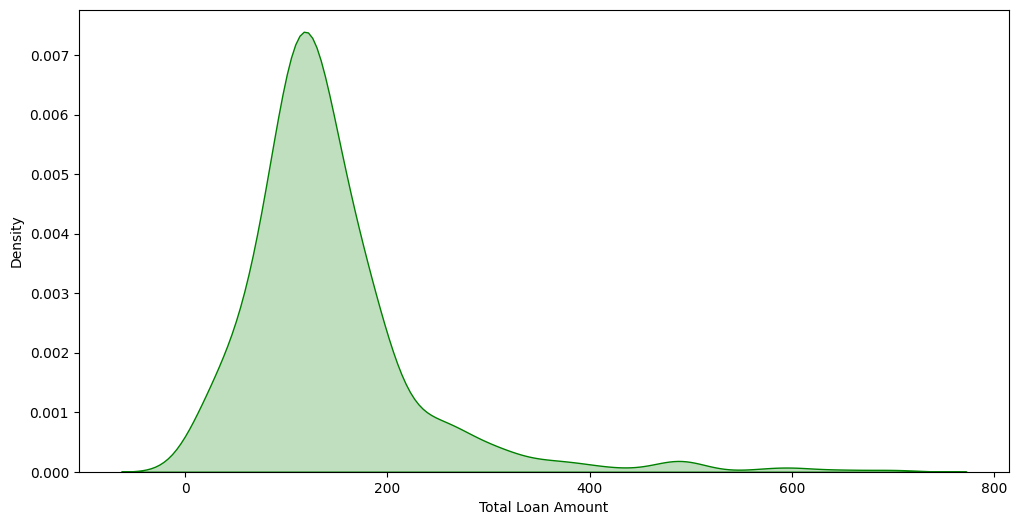

In [10]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['Loan_Amount'], fill=True, color='green')
plt.xlabel('Total Loan Amount')
plt.ylabel('Density')
plt.show()

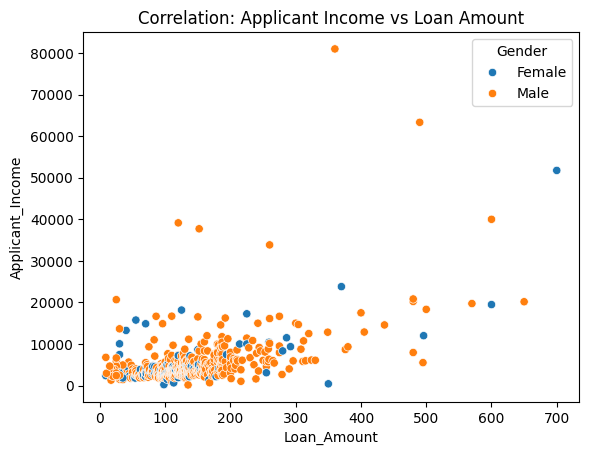

In [11]:
sns.scatterplot(df, x='Loan_Amount', y='Applicant_Income', hue='Gender')
plt.title('Correlation: Applicant Income vs Loan Amount')
plt.show()

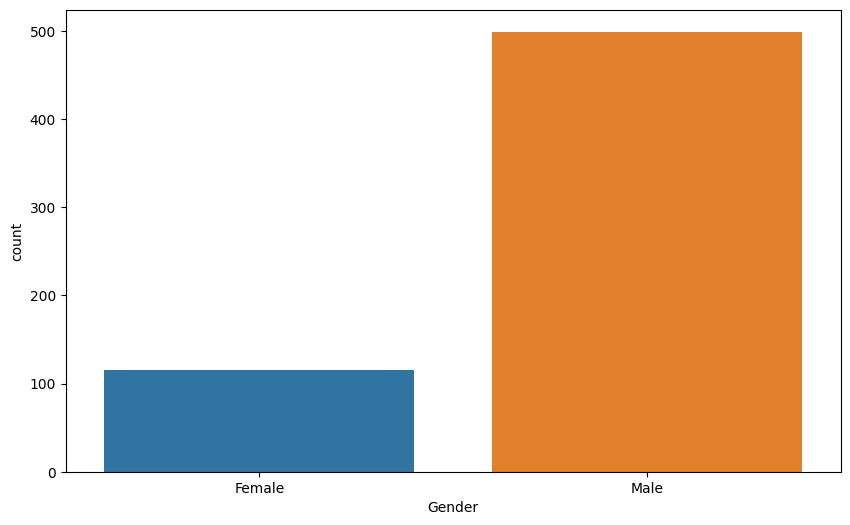

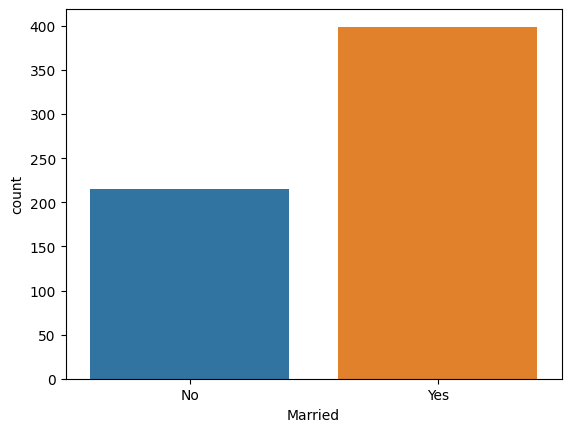

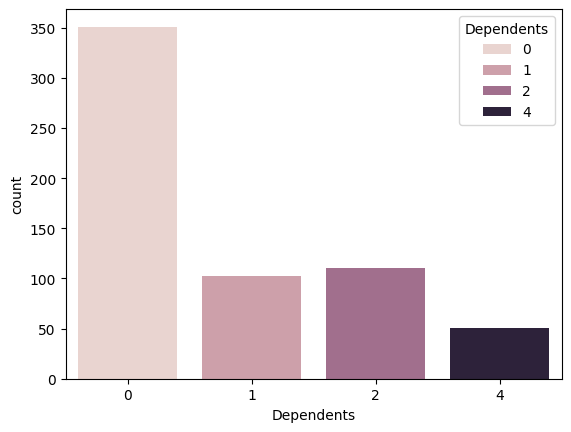

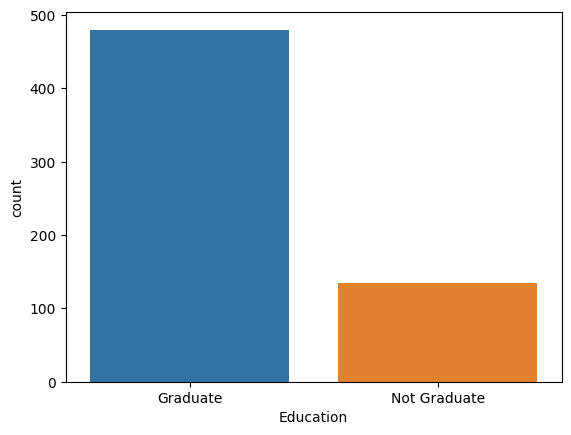

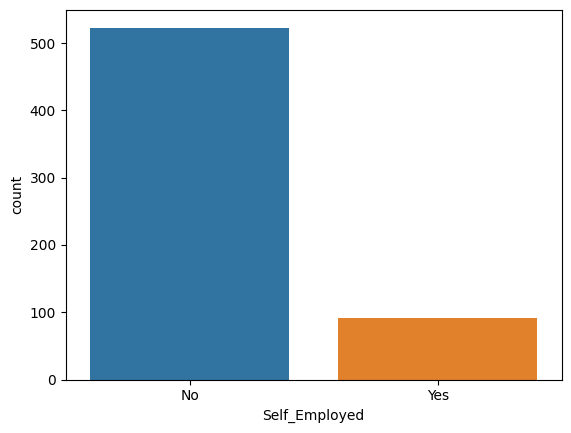

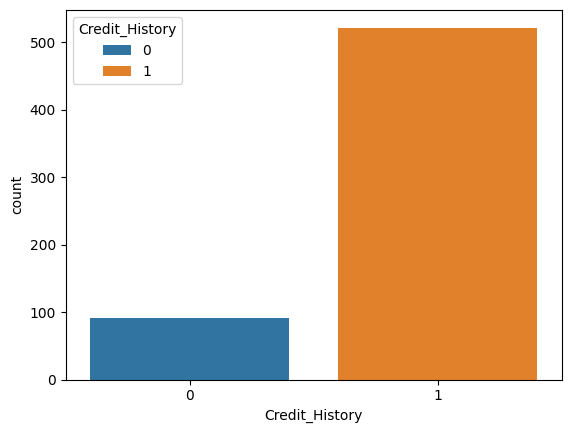

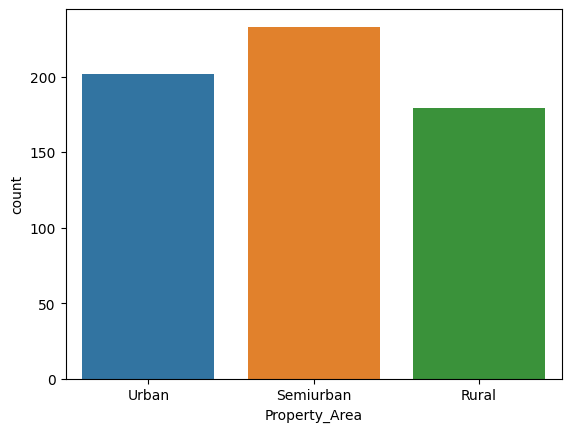

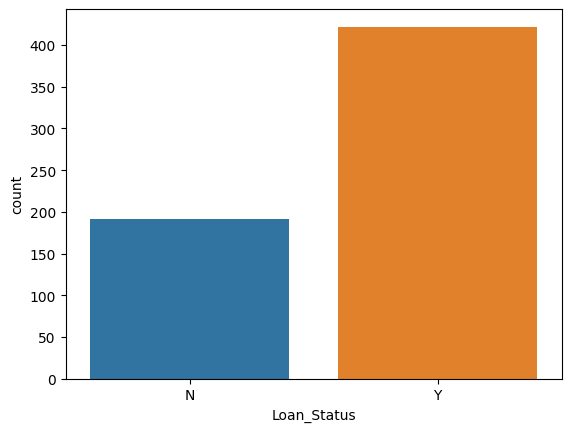

In [12]:
plt.figure(figsize=(10,6))
for col in ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(df, x=col, hue=col)
    plt.show()

In [13]:
df.groupby('Gender')['Married'].value_counts()

Gender  Married
Female  No          82
        Yes         33
Male    Yes        366
        No         133
Name: count, dtype: int64

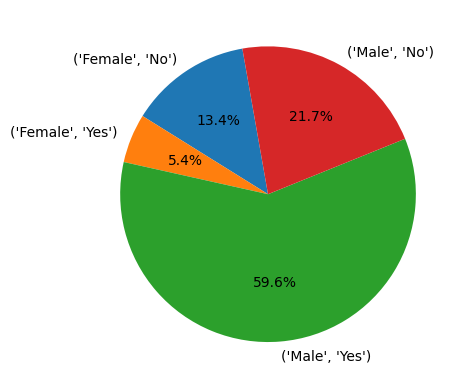

In [14]:
count=df.groupby('Gender')['Married'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.show()

In [15]:
df.groupby('Gender')['Dependents'].value_counts()

Gender  Dependents
Female  0              83
        1              19
        2               7
        4               6
Male    0             268
        2             103
        1              83
        4              45
Name: count, dtype: int64

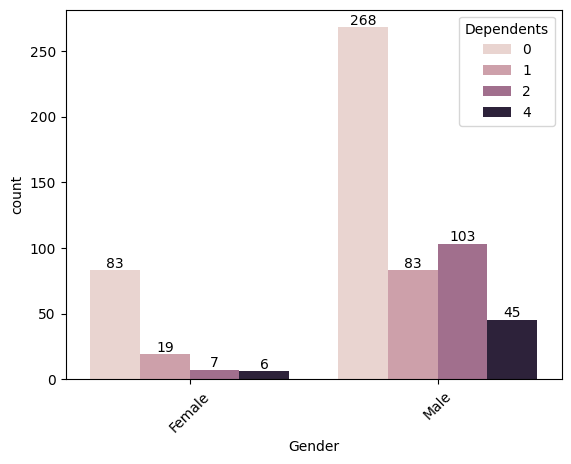

In [16]:
ax=sns.countplot(df, x='Gender', hue='Dependents')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()    


In [17]:
df.groupby('Gender')['Education'].value_counts()

Gender  Education   
Female  Graduate         95
        Not Graduate     20
Male    Graduate        385
        Not Graduate    114
Name: count, dtype: int64

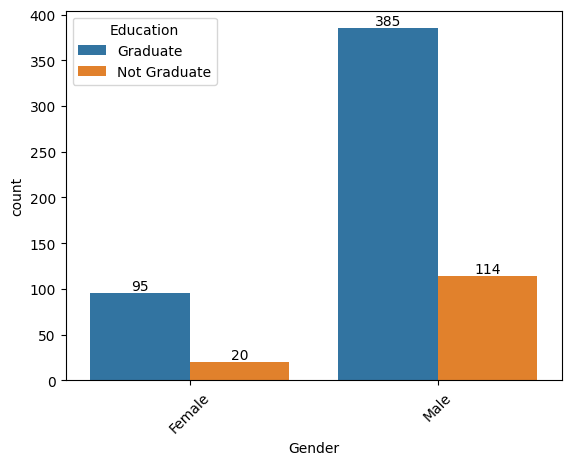

In [18]:
ax=sns.countplot(df, x='Gender', hue='Education')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [19]:
df.groupby('Gender')['Self_Employed'].value_counts()

Gender  Self_Employed
Female  No                95
        Yes               20
Male    No               428
        Yes               71
Name: count, dtype: int64

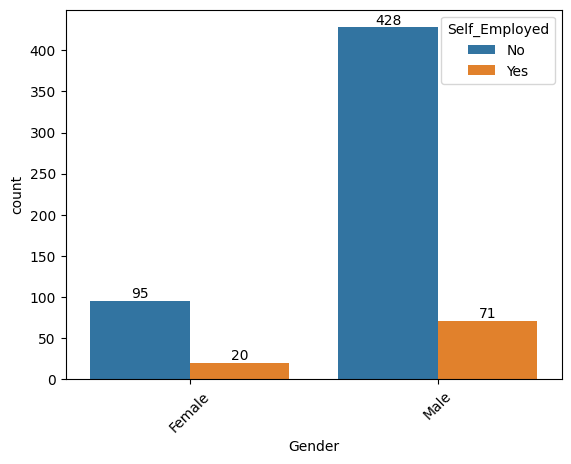

In [20]:
ax=sns.countplot(df, x='Gender', hue='Self_Employed')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [21]:
df.groupby('Gender')['Credit_History'].value_counts()

Gender  Credit_History
Female  1                  96
        0                  19
Male    1                 426
        0                  73
Name: count, dtype: int64

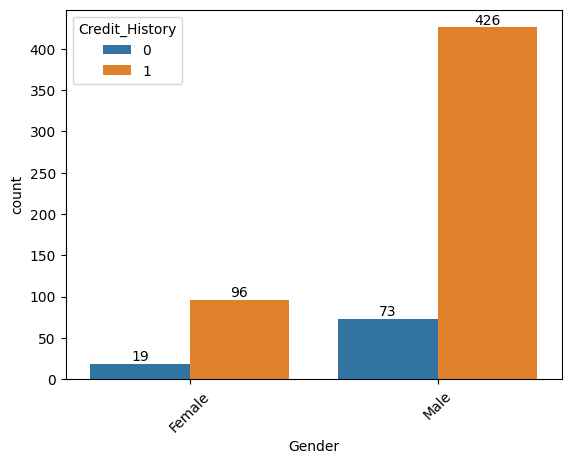

In [22]:
ax=sns.countplot(df, x='Gender', hue='Credit_History')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [23]:
df.groupby('Gender')['Property_Area'].value_counts()

Gender  Property_Area
Female  Semiurban         56
        Urban             34
        Rural             25
Male    Semiurban        177
        Urban            168
        Rural            154
Name: count, dtype: int64

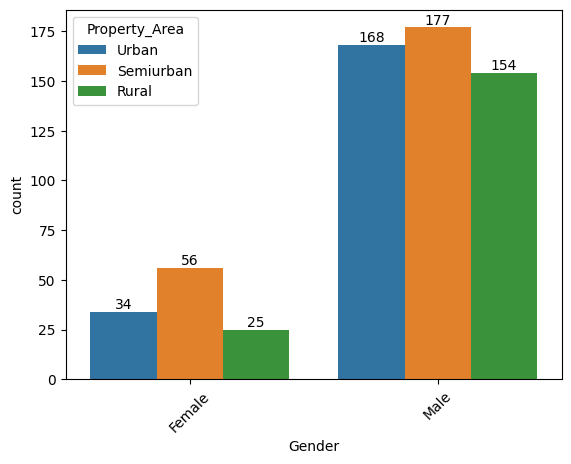

In [24]:
ax=sns.countplot(df, x='Gender', hue='Property_Area')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [25]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               78
        N               37
Male    Y              344
        N              155
Name: count, dtype: int64

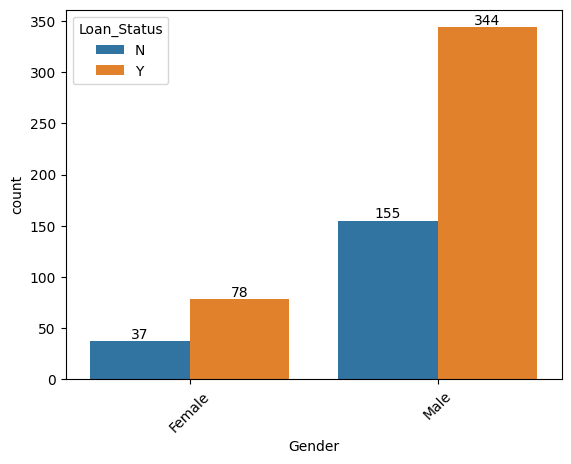

In [26]:
ax=sns.countplot(df, x='Gender', hue='Loan_Status')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)
plt.show()

In [27]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

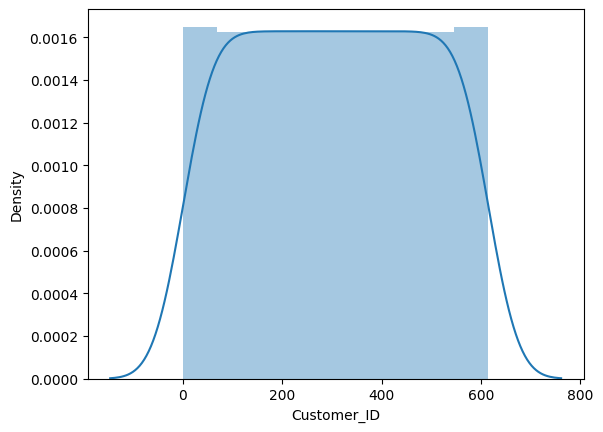

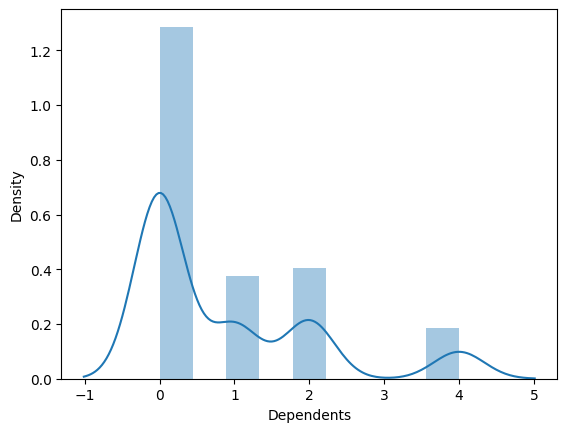

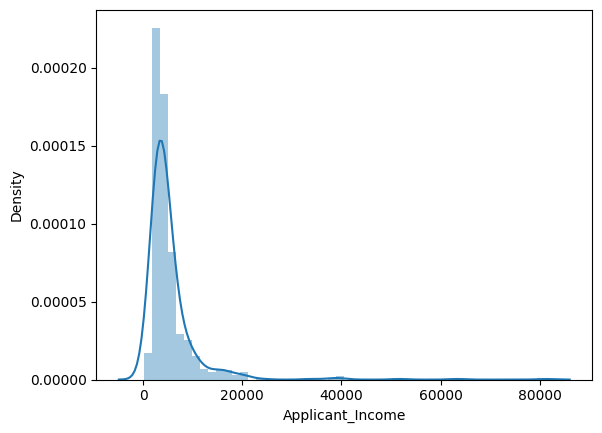

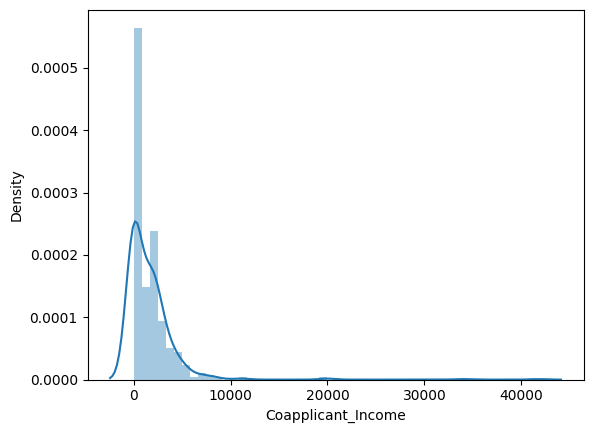

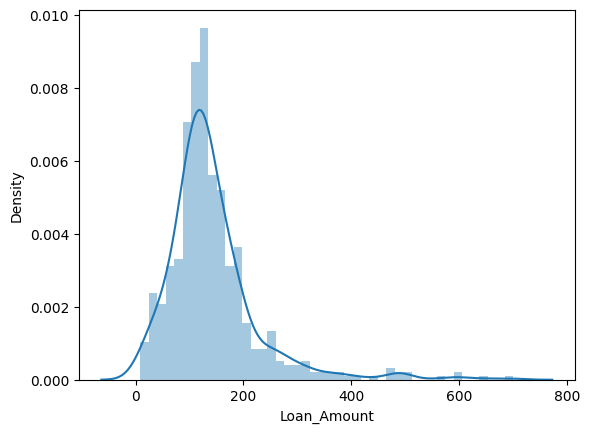

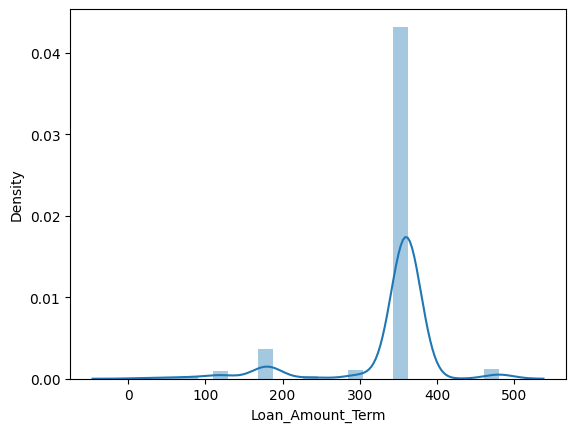

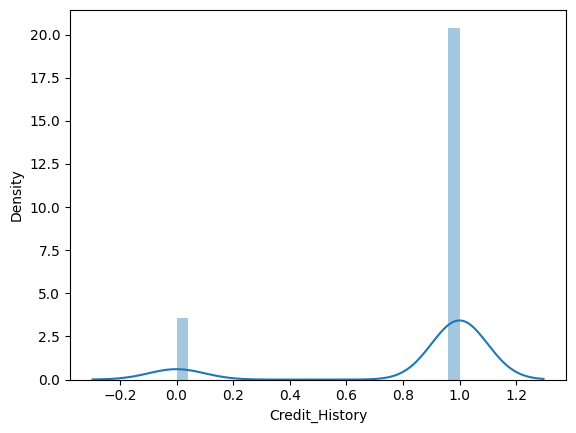

In [28]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [29]:
from sklearn.preprocessing import LabelEncoder
oe=LabelEncoder()
df['Education']=oe.fit_transform(df['Education'])
df['Self_Employed']=oe.fit_transform(df['Self_Employed'])
df['Property_Area']=oe.fit_transform(df['Property_Area'])
df['Loan_Status']=oe.fit_transform(df['Loan_Status'])
df['Married']=oe.fit_transform(df['Married'])

In [30]:
encode_gender=pd.get_dummies(df['Gender'], prefix='Gender', dtype=int)
df_encoded=pd.concat([df, encode_gender], axis=1)
df_encoded=df_encoded.drop('Gender', axis=1)
df_encoded.head()

,Customer_ID,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,569,0,0,0,0,2378,0.0,9,360,1,2,0,1,0
1,15,1,2,0,0,1299,1086.0,17,120,1,2,1,0,1
2,95,0,0,1,0,3620,0.0,25,120,1,1,1,0,1
3,134,1,0,0,1,3459,0.0,25,120,1,1,1,0,1
4,556,1,1,0,0,5468,1032.0,26,360,1,1,1,0,1


In [31]:
from scipy.stats import spearmanr
spearman_corr,p_value = spearmanr(df_encoded['Education'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): -0.0859
P-Value: 0.0334


In [32]:
spearman_corr,p_value = spearmanr(df_encoded['Applicant_Income'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): -0.0042
P-Value: 0.9180


In [33]:
spearman_corr,p_value = spearmanr(df_encoded['Coapplicant_Income'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): 0.0350
P-Value: 0.3872


In [34]:
spearman_corr,p_value = spearmanr(df_encoded['Credit_History'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): 0.5240
P-Value: 0.0000


In [35]:
spearman_corr,p_value = spearmanr(df_encoded['Property_Area'], df_encoded['Loan_Status'])
print(f'Spearman Correlation (rho): {spearman_corr:.4f}')
print(f'P-Value: {p_value:.4f}')

Spearman Correlation (rho): 0.0298
P-Value: 0.4610


In [36]:
x=df_encoded.drop(columns={'Customer_ID','Loan_Status'})
y=df_encoded['Loan_Status']

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=3)

In [39]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x_train=sca.fit_transform(x_train)
x_test=sca.fit_transform(x_test)

In [40]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_smote))


Before SMOTE: Counter({1: 303, 0: 126})
After SMOTE: Counter({1: 303, 0: 303})


LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_smote, y_train_smote)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [43]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57       126
           1       0.82      0.85      0.83       303

    accuracy                           0.76       429
   macro avg       0.71      0.70      0.70       429
weighted avg       0.75      0.76      0.76       429


              precision    recall  f1-score   support

           0       0.68      0.52      0.59        66
           1       0.76      0.87      0.81       119

    accuracy                           0.74       185
   macro avg       0.72      0.69      0.70       185
weighted avg       0.73      0.74      0.73       185



In [44]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[ 69  57]
 [ 46 257]]

[[ 34  32]
 [ 16 103]]


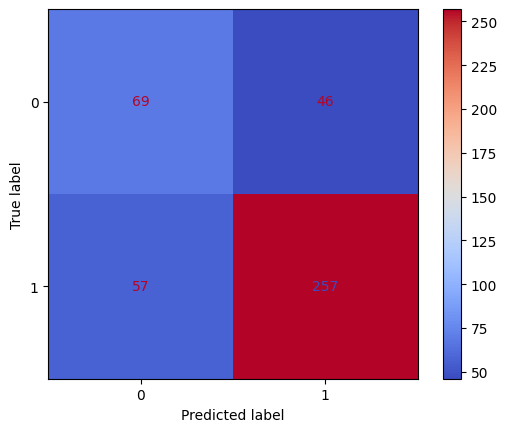

In [45]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_pred_train, y_train))
c_matrix.plot(cmap='coolwarm')

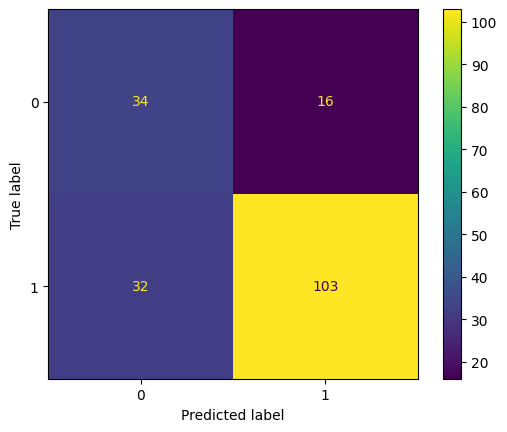

In [46]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_pred_test, y_test))
c_matrix.plot(cmap='viridis')

In [47]:
#Imports
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

#Define Parameter Distributions for Logistic Regression
param_dist = {
    'C': loguniform(1e-4, 1e2),   # Regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],          # Supports both l1 & l2
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,                 # 20–50 is usually enough
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,LogisticRegre...max_iter=1000)
,param_distributions,"{'C': <scipy.stats....001E8BE7B6F90>, 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'solver': ['saga']}"
,n_iter,30
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [48]:
#Best Parameters & CV Scores
print('Best Parameters:', random_search.best_params_)
print('Best CV F1 Score:', random_search.best_score_)


Best Parameters: {'C': np.float64(0.0003395900933162753), 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Best CV F1 Score: 0.6857718529049477


In [49]:
#Train & Evaluate Tuned Model
best_log_reg = random_search.best_estimator_

y_pred = best_log_reg.predict(x_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.42      0.57        66
           1       0.75      0.96      0.84       119

    accuracy                           0.77       185
   macro avg       0.80      0.69      0.70       185
weighted avg       0.79      0.77      0.74       185

[[ 28  38]
 [  5 114]]


RIDGE CLASSIFIER

In [50]:
from sklearn.linear_model import RidgeClassifier
rg=RidgeClassifier()
rg.fit(x_train_smote, y_train_smote)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,None


In [51]:
y_pred_train = rg.predict(x_train_smote)
y_pred_test = rg.predict(x_test)


In [52]:

print(classification_report(y_train_smote, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.84      0.50      0.63       303
           1       0.64      0.90      0.75       303

    accuracy                           0.70       606
   macro avg       0.74      0.70      0.69       606
weighted avg       0.74      0.70      0.69       606


              precision    recall  f1-score   support

           0       0.71      0.48      0.58        66
           1       0.76      0.89      0.82       119

    accuracy                           0.75       185
   macro avg       0.73      0.69      0.70       185
weighted avg       0.74      0.75      0.73       185



In [53]:
print(confusion_matrix(y_train_smote, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[152 151]
 [ 29 274]]

[[ 32  34]
 [ 13 106]]


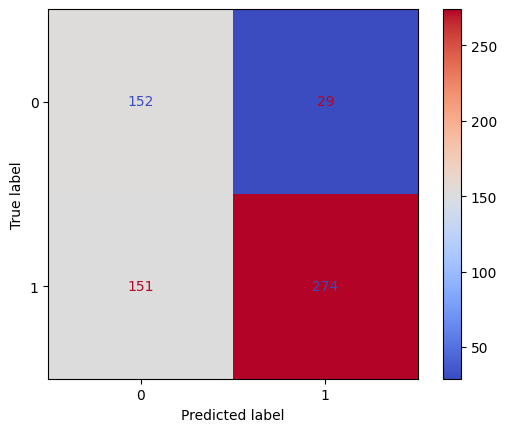

In [54]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_pred_train, y_train_smote))
c_matrix.plot(cmap='coolwarm')
plt.show()

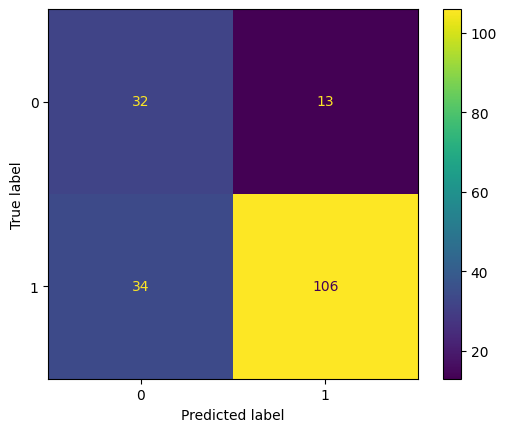

In [55]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_pred_test, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [56]:
#Define Parameter Distributions for Ridge Classifier
param_dist = {
    'alpha': loguniform(1e-4, 1e2),   # Regularization strength
    'class_weight': [None, 'balanced'],
    'solver': ['auto', 'sag', 'saga', 'lbfgs']
}

random_search = RandomizedSearchCV(
    estimator=rg,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,RidgeClassifier()
,param_distributions,"{'alpha': <scipy.stats....001E8C2A08550>, 'class_weight': [None, 'balanced'], 'solver': ['auto', 'sag', ...]}"
,n_iter,30
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [57]:
#Best Parameters & CV Scores
print("Best Parameters:", random_search.best_params_)
print("Best CV F1 Score:", random_search.best_score_)


Best Parameters: {'alpha': np.float64(9.877700294007917), 'class_weight': 'balanced', 'solver': 'sag'}
Best CV F1 Score: 0.6799214430616327


In [58]:
#Train & Evaluate Tuned Model
best_ridge = random_search.best_estimator_

y_pred = best_ridge.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.48      0.58        66
           1       0.76      0.90      0.82       119

    accuracy                           0.75       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.75      0.75      0.74       185

[[ 32  34]
 [ 12 107]]


BAGGING CLASSIFIER

In [59]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier()
bg.fit(x_train_smote, y_train_smote)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [60]:
yhat_train_bg=bg.predict(x_train_smote)
yhat_test_bg=bg.predict(x_test)

In [61]:
print(classification_report(y_train_smote, yhat_train_bg))
print()
print(classification_report(y_test, yhat_test_bg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       303
           1       0.99      0.99      0.99       303

    accuracy                           0.99       606
   macro avg       0.99      0.99      0.99       606
weighted avg       0.99      0.99      0.99       606


              precision    recall  f1-score   support

           0       0.73      0.55      0.63        66
           1       0.78      0.89      0.83       119

    accuracy                           0.77       185
   macro avg       0.76      0.72      0.73       185
weighted avg       0.76      0.77      0.76       185



In [62]:
print(confusion_matrix(y_train_smote, yhat_train_bg))
print()
print(confusion_matrix(y_test, yhat_test_bg))

[[300   3]
 [  3 300]]

[[ 36  30]
 [ 13 106]]


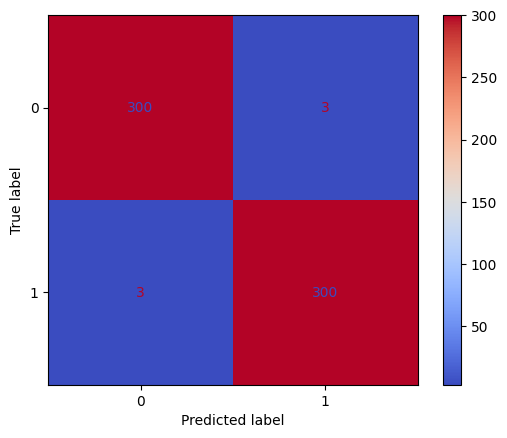

In [63]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_bg, y_train_smote))
c_matrix.plot(cmap='coolwarm')
plt.show()

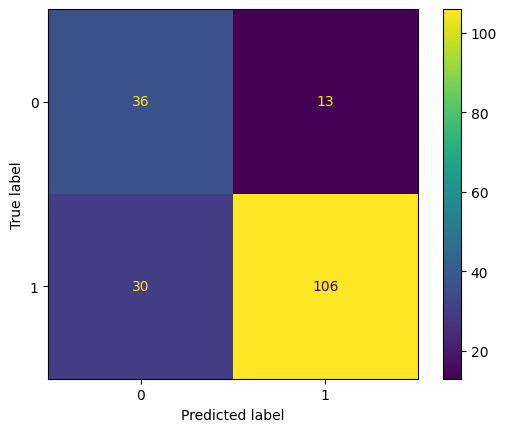

In [64]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_bg, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [65]:
#Imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(random_state=42)


#Define Parameter Distributions for Bagging Classifier
param_dist = {
    'n_estimators': randint(50, 300),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [5, 10, 20, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

bagging = BaggingClassifier(estimator=base_estimator, random_state=42, n_jobs=-1)


random_search = RandomizedSearchCV(
    estimator=bagging,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,BaggingClassi...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'estimator__max_depth': [5, 10, ...], 'estimator__min_samples_leaf': [1, 2, ...], 'estimator__min_samples_split': [2, 5, ...], ...}"
,n_iter,30
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [66]:
#Best Parameters & CV Score
print("Best Parameters:", random_search.best_params_)
print("Best CV F1 Score:", random_search.best_score_)

Best Parameters: {'bootstrap': False, 'estimator__max_depth': 10, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 179}
Best CV F1 Score: 0.8478122119953136


In [67]:
#Train & Evaluate Tuned Model
best_bagging = random_search.best_estimator_

y_pred = best_bagging.predict(x_test)

print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.53      0.61        66
           1       0.77      0.89      0.83       119

    accuracy                           0.76       185
   macro avg       0.75      0.71      0.72       185
weighted avg       0.76      0.76      0.75       185


[[ 35  31]
 [ 13 106]]


RANDOMFOREST CLASSIFIER

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train_smote, y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
yhat_train_rfc=rfc.predict(x_train_smote)
yhat_test_rfc=rfc.predict(x_test)

In [70]:
print(classification_report(y_train_smote, yhat_train_rfc))
print()
print(classification_report(y_test, yhat_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       303

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606


              precision    recall  f1-score   support

           0       0.75      0.50      0.60        66
           1       0.77      0.91      0.83       119

    accuracy                           0.76       185
   macro avg       0.76      0.70      0.72       185
weighted avg       0.76      0.76      0.75       185



In [71]:
print(confusion_matrix(y_train_smote, yhat_train_rfc))
print()
print(confusion_matrix(y_test, yhat_test_rfc))

[[303   0]
 [  0 303]]

[[ 33  33]
 [ 11 108]]


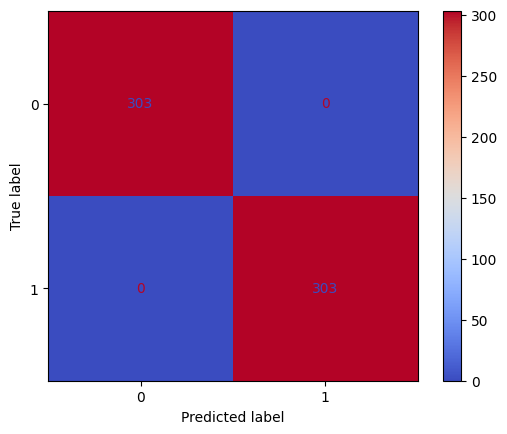

In [72]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_rfc, y_train_smote))
c_matrix.plot(cmap='coolwarm')
plt.show()

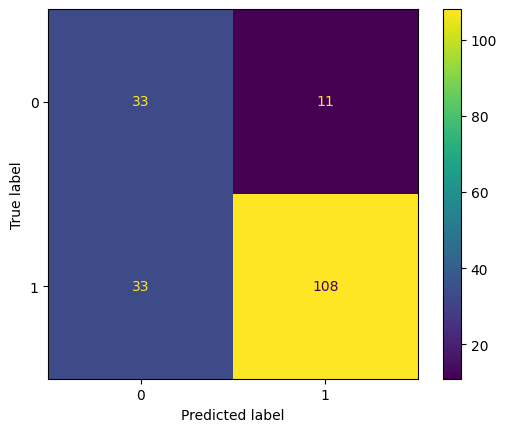

In [73]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_rfc, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [74]:
#Define Parameter Distributions for RandomForestClassifier
param_dist = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=25,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,25
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [75]:
#Best Parameters & CV Score
print('Best Parameters:', grid_search.best_params_)
print('Best CV Score:', grid_search.best_score_)

Best Parameters: {'n_estimators': np.int64(400), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best CV Score: 0.8463653578935052


In [76]:
#Train & Evaluate Tuned Model
best_rfc = grid_search.best_estimator_

y_pred = best_rfc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.47      0.58        66
           1       0.76      0.92      0.83       119

    accuracy                           0.76       185
   macro avg       0.76      0.69      0.70       185
weighted avg       0.76      0.76      0.74       185

[[ 31  35]
 [ 10 109]]


ADABOOST CLASSIFIER

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train_smote, y_train_smote)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [78]:
yhat_train_ada=ada.predict(x_train_smote)
yhat_test_ada=ada.predict(x_test)

In [79]:
print(classification_report(y_train_smote, yhat_train_ada))
print()
print(classification_report(y_test, yhat_test_ada))

              precision    recall  f1-score   support

           0       0.87      0.65      0.75       303
           1       0.72      0.90      0.80       303

    accuracy                           0.78       606
   macro avg       0.80      0.78      0.77       606
weighted avg       0.80      0.78      0.77       606


              precision    recall  f1-score   support

           0       0.77      0.50      0.61        66
           1       0.77      0.92      0.84       119

    accuracy                           0.77       185
   macro avg       0.77      0.71      0.72       185
weighted avg       0.77      0.77      0.75       185



In [80]:
print(confusion_matrix(y_train_smote, yhat_train_ada))
print()
print(confusion_matrix(y_test, yhat_test_ada))

[[198 105]
 [ 30 273]]

[[ 33  33]
 [ 10 109]]


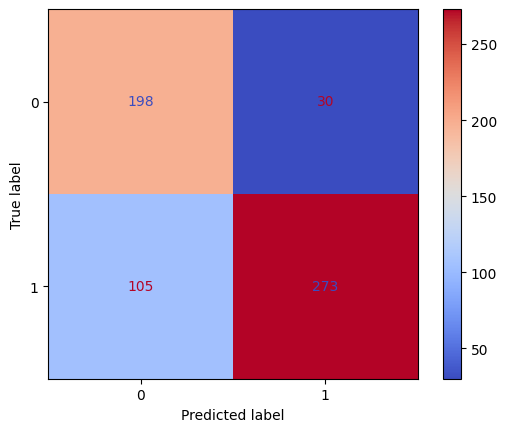

In [81]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_ada, y_train_smote))
c_matrix.plot(cmap='coolwarm')
plt.show()

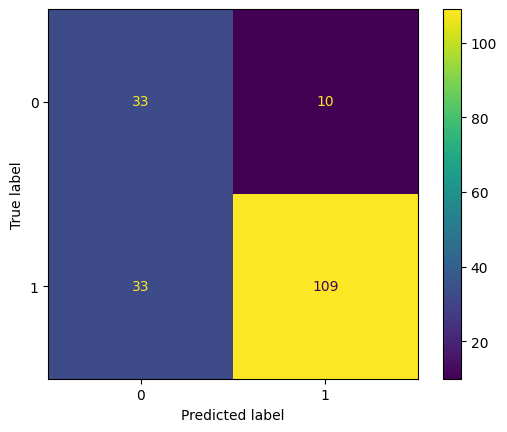

In [82]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_ada, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [83]:
from scipy.stats import uniform

#Define Parameter Distributions for AdaBoost Classifier
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
param_dist = {
    'n_estimators': randint(50, 400),
    'learning_rate': uniform(0.01, 1.0),
    'estimator__max_depth': [1, 2, 3]
}
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)


random_search = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,AdaBoostClass...ndom_state=42)
,param_distributions,"{'estimator__max_depth': [1, 2, ...], 'learning_rate': <scipy.stats....001E8C33E8910>, 'n_estimators': <scipy.stats....001E8C33E8690>}"
,n_iter,30
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [84]:
#Best Parameters & CV Score
print("Best Parameters:", random_search.best_params_)
print("Best CV F1 Score:", random_search.best_score_)


Best Parameters: {'estimator__max_depth': 3, 'learning_rate': np.float64(0.8065429868602328), 'n_estimators': 320}
Best CV F1 Score: 0.841688006921426


In [85]:
#Train & Evaluate Tuned Model
best_ada = random_search.best_estimator_

y_pred = best_ada.predict(x_test)

print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.55      0.54        66
           1       0.75      0.74      0.74       119

    accuracy                           0.67       185
   macro avg       0.64      0.64      0.64       185
weighted avg       0.67      0.67      0.67       185


[[36 30]
 [31 88]]


SUPPORT VENDOR CLASSIFIER

In [86]:
from sklearn.svm import SVC
s2=SVC(kernel='linear')
s2.fit(x_train_smote, y_train_smote)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [87]:
yhat_train_s2=s2.predict(x_train_smote)
yhat_test_s2=s2.predict(x_test)

In [88]:
print(classification_report(y_train_smote, yhat_train_s2))
print()
print(classification_report(y_test, yhat_test_s2))

              precision    recall  f1-score   support

           0       0.95      0.43      0.59       303
           1       0.63      0.98      0.77       303

    accuracy                           0.70       606
   macro avg       0.79      0.70      0.68       606
weighted avg       0.79      0.70      0.68       606


              precision    recall  f1-score   support

           0       0.90      0.41      0.56        66
           1       0.75      0.97      0.85       119

    accuracy                           0.77       185
   macro avg       0.82      0.69      0.70       185
weighted avg       0.80      0.77      0.75       185



In [89]:
print(confusion_matrix(y_train_smote, yhat_train_s2))
print()
print(confusion_matrix(y_test, yhat_test_s2))

[[130 173]
 [  7 296]]

[[ 27  39]
 [  3 116]]


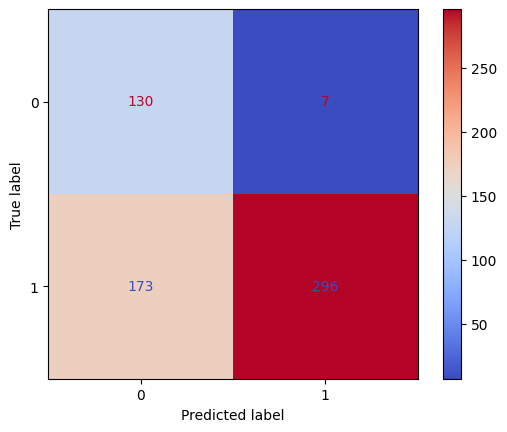

In [90]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_s2, y_train_smote))
c_matrix.plot(cmap='coolwarm')
plt.show()

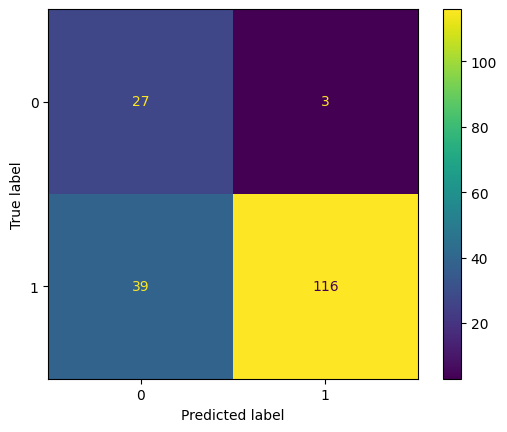

In [91]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_s2, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [92]:
#Define Parameter Distributions for SVC
param_dist = {
    'C': loguniform(1e-3, 1e3),      # Regularization strength
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=s2,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,SVC(kernel='linear')
,param_distributions,"{'C': <scipy.stats....001E8C2E72190>, 'class_weight': [None, 'balanced'], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}"
,n_iter,30
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [93]:
#Best Parameters & CV Score
print("Best Parameters:", random_search.best_params_)
print("Best CV F1 Score:", random_search.best_score_)


Best Parameters: {'C': np.float64(70.85721663941601), 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV F1 Score: 0.811574213617369


In [94]:
#Train & Evaluate Tuned Model
best_svc = random_search.best_estimator_

y_pred = best_svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.42      0.45        66
           1       0.70      0.75      0.72       119

    accuracy                           0.63       185
   macro avg       0.59      0.59      0.59       185
weighted avg       0.62      0.63      0.63       185

[[28 38]
 [30 89]]


In [95]:
#Create a new DataFrame to predict its Loan Status
x_data=pd.DataFrame({
    'Married':[0],
    'Dependents':[1],
    'Education':[1],
    'Self_Employed':[1],
    'Applicant_Income':[7000],
    'Coapplicant_Income':[5000],
    'Loan_Amount':[500],
    'Loan_Amount_Term':[120],
    'Credit_History':[1],
    'Property_Area':[1],
    'Gender_Female':[1],
    'Gender_Male':[0]
})
x_data.head()

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male
0,0,1,1,1,7000,5000,500,120,1,1,1,0


In [96]:
#Predict the new data based on Logistic Regression Model
x_data_pred=model.predict(x_data)

In [97]:
#Append the resultto the DataFrame
x_data['Loan_Status']=x_data_pred

In [98]:
x_data.head()

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male,Loan_Status
0,0,1,1,1,7000,5000,500,120,1,1,1,0,1
